# Stock Market Prediction Model using Numerical and Textual Analysis
## Task-7
## Author: Yadu Sharma
### Data Science & Business Analytics Intern
### Objective:
To create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

In [1]:
# import necessary liberary
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
import math
from textblob import TextBlob
from datetime import datetime
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

### Importing the Numerical dataset
downloading  the dataset of thehistorical stock prices from https://finance.yahoo.com/

In [2]:
import yfinance as yf

# Download the historical stock price 
s1 = "2001-01-02" 
en1= "2022-03-31"
df_prices = yf.download('^BSESN', start=s1, end=en1,progress=False)

df_prices.to_csv('bse.csv',index=False)
df_prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300


### Importing the Textual dataset
downloaded textual (news) data from https://bit.ly/36fFPI6.

In [3]:
# load news headline csv
df_news = pd.read_csv("india-news-headlines.csv")
df_news

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


## EDA

In [4]:
#  missing values
df_prices.isnull().sum()
df_news.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [5]:
# Rename the 'publish_date' column to 'date'
df_news = df_news.rename(columns={'publish_date': 'Date'})

In [6]:
# Remove duplicates based on 'publish_date'
df_news = df_news.drop_duplicates(subset=['Date'])

In [7]:
# Convert 'Date' to a datetime format
df_news['Date'] = pd.to_datetime(df_news['Date'], format='%Y%m%d')

In [8]:
df_news.head()

,Date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
86,2001-01-03,unknown,Powerless north India gropes in the dark
127,2001-01-04,unknown,The string that pulled Stephen Hawking to India
280,2001-01-05,unknown,Light combat craft takes India into club class
406,2001-01-06,unknown,Light combat craft takes India into club class


In [9]:
# removing unnecessary column from dataset
df_news.drop(columns=['headline_category'],axis=1, inplace=True)

In [10]:
df_news.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
86,2001-01-03,Powerless north India gropes in the dark
127,2001-01-04,The string that pulled Stephen Hawking to India
280,2001-01-05,Light combat craft takes India into club class
406,2001-01-06,Light combat craft takes India into club class


### Sentiment Analysis of News Headlines

In [11]:
# Define a function to analyze the polarity of a headline
def getAnalysis_polarity(headline):
    # Create a TextBlob object to analyze the sentiment of the headline
    result = TextBlob(headline)
    
    # Check the polarity of the result
    if result.sentiment.polarity < 0:
        return 'negative'  # If polarity is negative, return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'   # If polarity is neutral, return 'neutral'
    else:
        return 'positive'  # If polarity is positive, return 'positive'

# Apply the 'getAnalysis_polarity' function to each headline in the 'headline_text' column
df_news['Result'] = np.array([getAnalysis_polarity(headline) for headline in df_news['headline_text']])

# Group the data by the 'Result' column and count the headlines in each category
final_result = df_news.groupby(['Result']).agg({'headline_text':'count'})

final_result

,headline_text
Result,
negative,773
neutral,5113
positive,1831


Positive Headlines:  headline_text    23.726837
Name: positive, dtype: float64

Negative Headlines:  headline_text    10.016846
Name: negative, dtype: float64

Unbiased Headlines:  headline_text    66.256317
Name: neutral, dtype: float64


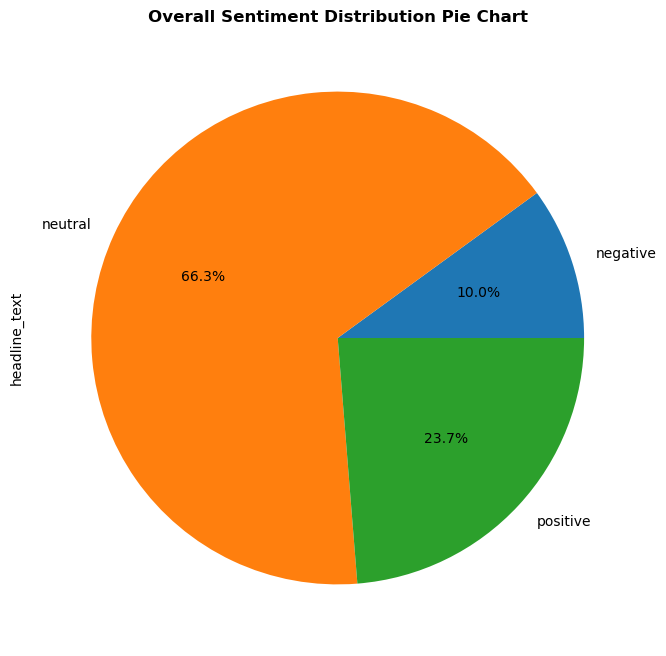

In [12]:
# Calculate the percentage of negative, neutral, and positive headlines
negative = (final_result.loc['negative'] / len(df_news)) * 100
neutral = (final_result.loc['neutral'] / len(df_news)) * 100
positive = (final_result.loc['positive'] / len(df_news)) * 100

# Print the percentages
print('Positive Headlines: ', positive)
print('\nNegative Headlines: ', negative)
print('\nUnbiased Headlines: ', neutral)

# Create a pie chart to visualize the overall sentiment distribution
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the pie chart with percentages
final_result['headline_text'].plot.pie(autopct='%1.1f%%')

# Set the title of the pie chart
plt.title("Overall Sentiment Distribution Pie Chart", fontweight="bold")

# Show the pie chart
plt.show()

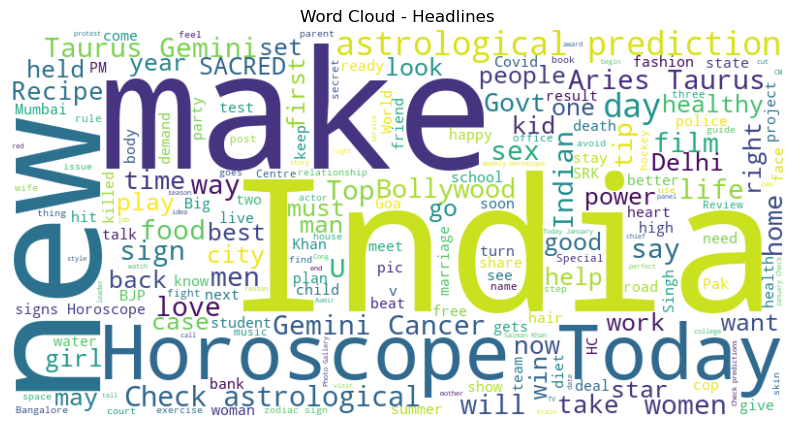

In [36]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(headline_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud - Headlines')
plt.show()

##  Hybrid Model for Stock Price Prediction

In [14]:
!pip install vaderSentiment
#importing other liberaries
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [15]:
# Merge the two tables based on the 'Date' column
hybrid_data = pd.merge(df_prices, df_news, on='Date', how='inner')

In [16]:
hybrid_data

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Result
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,Status quo will not be disturbed at Ayodhya; s...,neutral
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,Powerless north India gropes in the dark,negative
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,The string that pulled Stephen Hawking to India,neutral
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,Light combat craft takes India into club class,positive
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,Sangh Parivar; Babri panel up the ante,neutral
...,...,...,...,...,...,...,...,...,...
5200,2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400,This all-woman rap group is claiming their spa...,neutral
5201,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900,Speeding up; shortcuts and tackling unruly cus...,neutral
5202,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300,As fashion becomes democratic; demand for styl...,neutral
5203,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100,Bobby Deol: Like my dad; I hope to be working ...,neutral


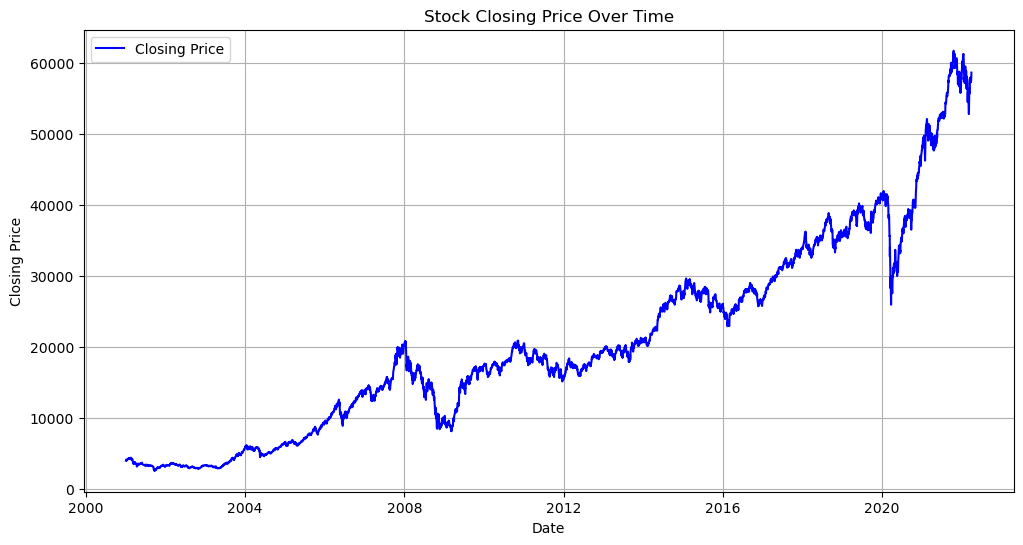

In [17]:
# stock closing price over time
plt.figure(figsize=(12, 6))
plt.plot(hybrid_data['Date'], hybrid_data['Close'], label='Closing Price', color='blue')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Convert the 'Result' column to dummy variables
senti_data = pd.get_dummies(hybrid_data['Result'], drop_first=True)

# Concatenate the dummy variables to the hybrid_data DataFrame
hybrid_data = pd.concat([hybrid_data, senti_data], axis=1)

# Display the first few rows of the modified DataFrame
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Result,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,neutral,positive
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0,0.00,0.000,0.2924,0.000,0.805,0.195,1,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,Powerless north India gropes in the dark,negative,0,0,0.65,-0.325,-0.4939,0.348,0.652,0.000,0,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,The string that pulled Stephen Hawking to India,neutral,1,0,0.00,0.000,0.0000,0.000,1.000,0.000,1,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,Light combat craft takes India into club class,positive,0,1,0.70,0.400,-0.3400,0.255,0.745,0.000,0,1
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,Sangh Parivar; Babri panel up the ante,neutral,1,0,0.00,0.000,0.0000,0.000,1.000,0.000,1,0


##  Adding subjectivity and polarity Scores to Textual Data

In [19]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity
     

#Adding subjectivity and polarity columns
hybrid_data['Subjectivity'] =hybrid_data['headline_text'].apply(getSubjectivity)
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(getPolarity)
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Result,neutral,positive,Subjectivity,Polarity
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0,0.00,0.000
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,Powerless north India gropes in the dark,negative,0,0,0.65,-0.325
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,The string that pulled Stephen Hawking to India,neutral,1,0,0.00,0.000
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,Light combat craft takes India into club class,positive,0,1,0.70,0.400
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,Sangh Parivar; Babri panel up the ante,neutral,1,0,0.00,0.000


## Performing Sentiment Analysis over the news Headlines of Hybrid Data

In [20]:
#Adding sentiment score to news
senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Result,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0,0.00,0.000,0.2924,0.000,0.805,0.195
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,Powerless north India gropes in the dark,negative,0,0,0.65,-0.325,-0.4939,0.348,0.652,0.000
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,The string that pulled Stephen Hawking to India,neutral,1,0,0.00,0.000,0.0000,0.000,1.000,0.000
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,Light combat craft takes India into club class,positive,0,1,0.70,0.400,-0.3400,0.255,0.745,0.000
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,Sangh Parivar; Babri panel up the ante,neutral,1,0,0.00,0.000,0.0000,0.000,1.000,0.000


In [21]:
# Extracting the desired columns from the 'hybrid_data' DataFrame
req_col = ['Open', 'High', 'Low', 'Volume', 'Compound', 'Negative', 'Neutral', 'Positive', 'positive']

# Creating a new DataFrame 'new_hybrid' with the selected columns
new_hybrid = hybrid_data[req_col]

# Resetting the index of the 'new_hybrid' DataFrame
new_hybrid.reset_index(inplace=True)

# Renaming the 'positive' column to 'Label' in the 'new_hybrid' DataFrame
new_hybrid.rename(columns={'positive': 'Label'}, inplace=True)

# Display the first few rows of the 'new_hybrid' DataFrame
new_hybrid.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_12940\226263172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_hybrid.rename(columns={'positive': 'Label'}, inplace=True)


,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,0,3953.219971,4028.570068,3929.370117,0,0.2924,0.000,0.805,0.195,0
1,1,3977.580078,4067.659912,3977.580078,0,-0.4939,0.348,0.652,0.000,0
2,2,4180.970215,4180.970215,4109.549805,0,0.0000,0.000,1.000,0.000,0
3,3,4116.339844,4195.009766,4115.350098,0,-0.3400,0.255,0.745,0.000,1
4,4,4164.759766,4206.720215,4101.529785,0,0.0000,0.000,1.000,0.000,0


## Training and Testing the Models for Stock Price/Performance Analysis

In [22]:
# Splitting data into features (X) and target (y)
X = new_hybrid.drop('Label', axis=1)
y = new_hybrid['Label']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Checking Data Quality

In [23]:
# Checking for NaN values in the training data
np.any(np.isnan(x_train))

# Checking for finite values in the training data
np.all(np.isfinite(x_train))

True

## Handling Missing Data

In [24]:
# Filling NaN values in the training and testing data with their respective means
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

## Stock Price/Performance analysis using Logistic Regressor Model

In [25]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test, y_logit_pred)

0.7377521613832853

## Stock Price/Performance analysis using Random Forest Model

In [26]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test, y_rf_pred)

0.8097982708933718

## Stock Price/Performance analysis using AdaBoost Model

In [27]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_adb_pred = adb.predict(x_test)
accuracy_score(y_test, y_adb_pred)

0.8049951969260326

## Stock Price/Performance analysis using Logistic Gradient Boosting Model

In [28]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test, y_xgb_pred)

0.8155619596541787

## Stock Price/Performance analysis using Linear Discriminant Analyser Model

In [29]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test, y_lda_pred)

0.7963496637848223

## Stock Price/Performance analysis using Decision Tree Model

In [30]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_score(y_test, y_dt_pred)

0.7214217098943324

In [31]:
# Printing the accuracy of each model
print("Accuracy of Logistic Regression Model: ", accuracy_score(y_test, y_logit_pred) * 100, "%")
print("Accuracy of Random forest Model: ", accuracy_score(y_test, y_rf_pred) * 100, "%")
print("Accuracy of Decision Tree Model: ", accuracy_score(y_test, y_dt_pred) * 100, "%")
print("Accuracy of Linear Discriminant Model: ", accuracy_score(y_test, y_lda_pred) * 100, "%")
print("Accuracy of AdaBoost Model: ", accuracy_score(y_test, y_adb_pred) * 100, "%")
print("Accuracy of Gradient Boosting Model: ", accuracy_score(y_test, y_xgb_pred) * 100, "%")

Accuracy of Logistic Regression Model:  73.77521613832853 %
Accuracy of Random forest Model:  80.97982708933718 %
Accuracy of Decision Tree Model:  72.14217098943324 %
Accuracy of Linear Discriminant Model:  79.63496637848223 %
Accuracy of AdaBoost Model:  80.49951969260326 %
Accuracy of Gradient Boosting Model:  81.55619596541787 %


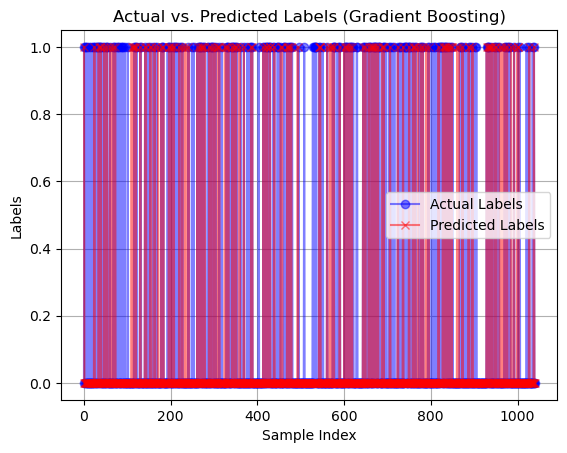

In [32]:

# Assuming you have actual and predicted values
actual_values = y_test  # Replace with your actual data
predicted_values = y_xgb_pred  # Replace with your predicted data

# Create a line chart for actual values
plt.plot(range(len(actual_values)), actual_values, label='Actual Labels', color='blue', marker='o', alpha=0.5)

# Create a line chart for predicted values
plt.plot(range(len(predicted_values)), predicted_values, label='Predicted Labels', color='red', marker='x', alpha=0.5)

# Add labels to the axes
plt.xlabel('Sample Index')
plt.ylabel('Labels')

# Add a title to the chart
plt.title('Actual vs. Predicted Labels (Gradient Boosting)')

# Display a legend
plt.legend()

# Show the chart
plt.grid(True)
plt.show()

In [33]:

# Compute a classification report
classification_rep = classification_report(y_test, y_xgb_pred)

# Print the classification report
print("Classification Report (Gradient Boosting):\n", classification_rep)


Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       790
           1       0.71      0.39      0.51       251

    accuracy                           0.82      1041
   macro avg       0.77      0.67      0.70      1041
weighted avg       0.80      0.82      0.80      1041



Confusion Matrix (Gradient Boosting):
 [[750  40]
 [152  99]]


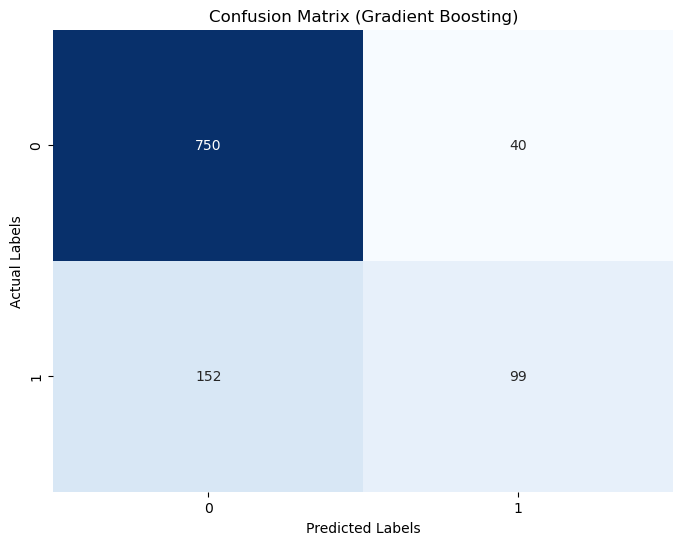

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_xgb_pred)

# Print the confusion matrix
print("Confusion Matrix (Gradient Boosting):\n", conf_matrix)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

## In conclusion, the hybrid model combining numerical analysis and sentiment analysis proved to be effective in predicting stock price/performance. The Gradient Boosting model outperformed other models, achieving the highest accuracy( 81.55619596541787 %). This analysis demonstrates the potential of leveraging both numerical and textual data for stock market prediction.

## Thankyou